In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Data Import

In [2]:
features_df = pd.read_csv("Features_data_set.csv")
sales_df = pd.read_csv("sales_data_set.csv")
stores_df = pd.read_csv("stores_data_set.csv")

In [3]:
# convert date column to pandas datetime format
features_df["Date"] = pd.to_datetime(features_df["Date"], format="%d/%m/%Y")
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%d/%m/%Y")

In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
num_feature_samples, num_features = features_df.shape
num_sale_samples, num_sale_features = sales_df.shape
num_stores_samples, num_stores_features = stores_df.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


# Create Final Dataset

## Combine Data to one Dataframe

In [8]:
tmp_df = pd.merge(sales_df, features_df, on=["Store", "Date", "IsHoliday"], how="left")
data_df = pd.merge(stores_df, tmp_df, on=["Store"], how="left")

In [9]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [10]:
num_samples, num_features = data_df.shape
print(f"The combined dataframe has {num_samples} samples and each sample has {num_features} features.")

The combined dataframe has 421570 samples and each sample has 16 features.


Check new dataframe for null values.

In [11]:
for col in data_df.columns:
    count_null = data_df[col].isnull().sum()
    print(f"The column {col} has {count_null} null values.")

The column Store has 0 null values.
The column Type has 0 null values.
The column Size has 0 null values.
The column Dept has 0 null values.
The column Date has 0 null values.
The column Weekly_Sales has 0 null values.
The column IsHoliday has 0 null values.
The column Temperature has 0 null values.
The column Fuel_Price has 0 null values.
The column MarkDown1 has 270889 null values.
The column MarkDown2 has 310322 null values.
The column MarkDown3 has 284479 null values.
The column MarkDown4 has 286603 null values.
The column MarkDown5 has 270138 null values.
The column CPI has 0 null values.
The column Unemployment has 0 null values.


## Convert Column IsHoliday from boolean to integer

In [12]:
data_df["IsHoliday"] = data_df["IsHoliday"].astype(int)

In [13]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
data_df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

## Convert Type Column to categorical
<br>
There are three types of stores available: A, B and C
<br>
Type A shall be converted to 0, Type B to 1 and Type C to 2

In [15]:
def convert_store_type(df):
    df_copy = df.copy()
    df_copy.loc[df_copy["Type"] == "A", "Type"] = 0
    df_copy.loc[df_copy["Type"] == "B", "Type"] = 1
    df_copy.loc[df_copy["Type"] == "C", "Type"] = 2
    df_copy["Type"] = df_copy["Type"].astype(int)
    return df_copy

In [16]:
data_df = convert_store_type(data_df)

In [17]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## Convert the Date Column to Seperate Features
Each date shall be converted to year and weekofyear categorical values.
Use WeekOfYear, because the final model should be able to predict the weekly sales for a given week.

In [18]:
data_df_copy = data_df
data_df_copy["Year"] = data_df_copy.Date.dt.year
data_df_copy["Week_of_Year"] = data_df_copy.Date.dt.weekofyear
# convert year, month and day to categorical values
data_df_converted = pd.get_dummies(data_df_copy, columns=["Year", "Week_of_Year"])

# remove column Date
data_df_converted.drop("Date", axis=1, inplace=True)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  app.launch_new_instance()


In [19]:
data_df_converted.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
0,1,0,151315,1,24924.50,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,0,151315,1,46039.49,1,38.51,2.548,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,0,151315,1,41595.55,0,39.93,2.514,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,0,151315,1,19403.54,0,46.63,2.561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,0,151315,1,21827.90,0,46.50,2.625,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Type             421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Dept             421570 non-null  int64  
 4   Weekly_Sales     421570 non-null  float64
 5   IsHoliday        421570 non-null  int64  
 6   Temperature      421570 non-null  float64
 7   Fuel_Price       421570 non-null  float64
 8   MarkDown1        150681 non-null  float64
 9   MarkDown2        111248 non-null  float64
 10  MarkDown3        137091 non-null  float64
 11  MarkDown4        134967 non-null  float64
 12  MarkDown5        151432 non-null  float64
 13  CPI              421570 non-null  float64
 14  Unemployment     421570 non-null  float64
 15  Year_2010        421570 non-null  uint8  
 16  Year_2011        421570 non-null  uint

In [21]:
num_samples, num_features = data_df_converted.shape
print(f"The converted dataframe has {num_samples} samples and each sample has {num_features} features.")

The converted dataframe has 421570 samples and each sample has 70 features.


## Imputation to Remove Missing Data


Use only the training data in order to fit the imputer and for validation and test data, the imputer should only be used in order to transform the features. In that way, data leakage shall be avoided.

In [22]:
from sklearn.model_selection import train_test_split
# split into train and test sets
df_train, df_test = train_test_split(data_df_converted, test_size=0.10, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.3, random_state=42)

In [23]:
print(f"Shape of training data: {df_train.shape}")
print(f"Shape of testing data: {df_test.shape}")
print(f"Shape of validation data: {df_val.shape}")

Shape of training data: (265589, 70)
Shape of testing data: (42157, 70)
Shape of validation data: (113824, 70)


In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=20, random_state=42, verbose=1)
imputer = imputer.fit(df_train[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (265589, 5)
[IterativeImputer] Change: 6391.152478912632, scaled tolerance: 141.63061 
[IterativeImputer] Change: 489.88354177812926, scaled tolerance: 141.63061 
[IterativeImputer] Change: 193.14071873259923, scaled tolerance: 141.63061 
[IterativeImputer] Change: 132.7023651664574, scaled tolerance: 141.63061 
[IterativeImputer] Early stopping criterion reached.


In [25]:
df_train_imputed = imputer.transform(df_train[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_test_imputed = imputer.transform(df_test[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_val_imputed = imputer.transform(df_val[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (265589, 5)
[IterativeImputer] Completing matrix with shape (42157, 5)
[IterativeImputer] Completing matrix with shape (113824, 5)


In [26]:
def add_new_markdown_cols(df_orig, data_df_imputed):
    df_new = df_orig.copy()
    df_new["MarkDown1"] = data_df_imputed[:, 0]
    df_new["MarkDown2"] = data_df_imputed[:, 1]
    df_new["MarkDown3"] = data_df_imputed[:, 2]
    df_new["MarkDown4"] = data_df_imputed[:, 3]
    df_new["MarkDown5"] = data_df_imputed[:, 4]
    
    return df_new

In [27]:
# add new MarkDown data to dataframe
df_train = add_new_markdown_cols(df_train, df_train_imputed)
df_val = add_new_markdown_cols(df_val, df_val_imputed)
df_test = add_new_markdown_cols(df_test, df_test_imputed)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265589 entries, 166177 to 204287
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            265589 non-null  int64  
 1   Type             265589 non-null  int64  
 2   Size             265589 non-null  int64  
 3   Dept             265589 non-null  int64  
 4   Weekly_Sales     265589 non-null  float64
 5   IsHoliday        265589 non-null  int64  
 6   Temperature      265589 non-null  float64
 7   Fuel_Price       265589 non-null  float64
 8   MarkDown1        265589 non-null  float64
 9   MarkDown2        265589 non-null  float64
 10  MarkDown3        265589 non-null  float64
 11  MarkDown4        265589 non-null  float64
 12  MarkDown5        265589 non-null  float64
 13  CPI              265589 non-null  float64
 14  Unemployment     265589 non-null  float64
 15  Year_2010        265589 non-null  uint8  
 16  Year_2011        265589 non-null 

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42157 entries, 272342 to 14519
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            42157 non-null  int64  
 1   Type             42157 non-null  int64  
 2   Size             42157 non-null  int64  
 3   Dept             42157 non-null  int64  
 4   Weekly_Sales     42157 non-null  float64
 5   IsHoliday        42157 non-null  int64  
 6   Temperature      42157 non-null  float64
 7   Fuel_Price       42157 non-null  float64
 8   MarkDown1        42157 non-null  float64
 9   MarkDown2        42157 non-null  float64
 10  MarkDown3        42157 non-null  float64
 11  MarkDown4        42157 non-null  float64
 12  MarkDown5        42157 non-null  float64
 13  CPI              42157 non-null  float64
 14  Unemployment     42157 non-null  float64
 15  Year_2010        42157 non-null  uint8  
 16  Year_2011        42157 non-null  uint8  
 17  Year_20

In [30]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113824 entries, 253037 to 286943
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            113824 non-null  int64  
 1   Type             113824 non-null  int64  
 2   Size             113824 non-null  int64  
 3   Dept             113824 non-null  int64  
 4   Weekly_Sales     113824 non-null  float64
 5   IsHoliday        113824 non-null  int64  
 6   Temperature      113824 non-null  float64
 7   Fuel_Price       113824 non-null  float64
 8   MarkDown1        113824 non-null  float64
 9   MarkDown2        113824 non-null  float64
 10  MarkDown3        113824 non-null  float64
 11  MarkDown4        113824 non-null  float64
 12  MarkDown5        113824 non-null  float64
 13  CPI              113824 non-null  float64
 14  Unemployment     113824 non-null  float64
 15  Year_2010        113824 non-null  uint8  
 16  Year_2011        113824 non-null 

In [31]:
df_train.describe()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
count,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.00000,265589.000000,265589.000000,265589.000000,...,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000
mean,22.181845,0.589584,136733.654636,44.278573,15966.509698,0.070707,60.10157,3.360732,7247.188332,3323.626927,...,0.021104,0.013867,0.014157,0.013879,0.014127,0.013943,0.014443,0.014108,0.014093,0.014135
std,12.790792,0.666081,60981.469398,30.475535,22667.312838,0.256335,18.42774,0.458687,4949.974137,4846.041844,...,0.143731,0.116940,0.118139,0.116987,0.118015,0.117253,0.119310,0.117938,0.117876,0.118046
min,1.000000,0.000000,34875.000000,1.000000,-4988.940000,0.000000,-2.06000,2.472000,0.270000,-265.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,93638.000000,18.000000,2082.000000,0.000000,46.74000,2.932000,7247.188332,3286.017049,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,140167.000000,37.000000,7600.150000,0.000000,62.10000,3.452000,7247.188332,3323.626927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,1.000000,202505.000000,74.000000,20208.720000,0.000000,74.25000,3.738000,7247.188332,3323.626927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,2.000000,219622.000000,99.000000,693099.360000,1.000000,100.14000,4.468000,88646.760000,104519.540000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into X and Y
X: Numpy array of features with shape (n_samples, n_features) <br>
Y: Numpy array of target with shape (n_samples,)

In [32]:
def get_X_and_Y(df):
    df_copy = df.copy()
    X = df_copy.drop("Weekly_Sales", axis=1, inplace=False).to_numpy()
    Y = df_copy["Weekly_Sales"].to_numpy()
    
    return X, Y

In [33]:
features_list = list(df_train.drop("Weekly_Sales", axis=1, inplace=False).columns)
X_train, Y_train = get_X_and_Y(df_train)
X_val, Y_val = get_X_and_Y(df_val)
X_test, Y_test = get_X_and_Y(df_test)

In [34]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print(features_list)

Shape of X_train: (265589, 69)
Shape of Y_train: (265589,)
Shape of X_val: (113824, 69)
Shape of Y_val: (113824,)
Shape of X_test: (42157, 69)
Shape of Y_test: (42157,)
['Store', 'Type', 'Size', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year_2010', 'Year_2011', 'Year_2012', 'Week_of_Year_1', 'Week_of_Year_2', 'Week_of_Year_3', 'Week_of_Year_4', 'Week_of_Year_5', 'Week_of_Year_6', 'Week_of_Year_7', 'Week_of_Year_8', 'Week_of_Year_9', 'Week_of_Year_10', 'Week_of_Year_11', 'Week_of_Year_12', 'Week_of_Year_13', 'Week_of_Year_14', 'Week_of_Year_15', 'Week_of_Year_16', 'Week_of_Year_17', 'Week_of_Year_18', 'Week_of_Year_19', 'Week_of_Year_20', 'Week_of_Year_21', 'Week_of_Year_22', 'Week_of_Year_23', 'Week_of_Year_24', 'Week_of_Year_25', 'Week_of_Year_26', 'Week_of_Year_27', 'Week_of_Year_28', 'Week_of_Year_29', 'Week_of_Year_30', 'Week_of_Year_31', 'Week_of_Year_32', 'Week_of_Year_33', 'Week_of_Y

## Check Features for Importance on Target

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [36]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(f'Feature {features_list[i]}: {fs.scores_[i]}')

Feature Store: 1882.7973682566171
Feature Type: 9205.905883652098
Feature Size: 16968.518222511495
Feature Dept: 5949.574485928217
Feature IsHoliday: 50.16165656921258
Feature Temperature: 4.350837941750432
Feature Fuel_Price: 0.07924397690672207
Feature MarkDown1: 755.1378216852355
Feature MarkDown2: 51.12197871133547
Feature MarkDown3: 246.01746643710246
Feature MarkDown4: 460.5241517321444
Feature MarkDown5: 904.0291341621172
Feature CPI: 157.053243635068
Feature Unemployment: 175.0155133876871
Feature Year_2010: 20.423633457759784
Feature Year_2011: 0.501871470802699
Feature Year_2012: 15.22005929446171
Feature Week_of_Year_1: 14.945722585463116
Feature Week_of_Year_2: 28.130937795568137
Feature Week_of_Year_3: 27.40095982786242
Feature Week_of_Year_4: 46.20032304038465
Feature Week_of_Year_5: 0.44523586115094016
Feature Week_of_Year_6: 2.8297539079303373
Feature Week_of_Year_7: 3.374325725885026
Feature Week_of_Year_8: 5.184903086394928
Feature Week_of_Year_9: 1.115363097847749
Fe

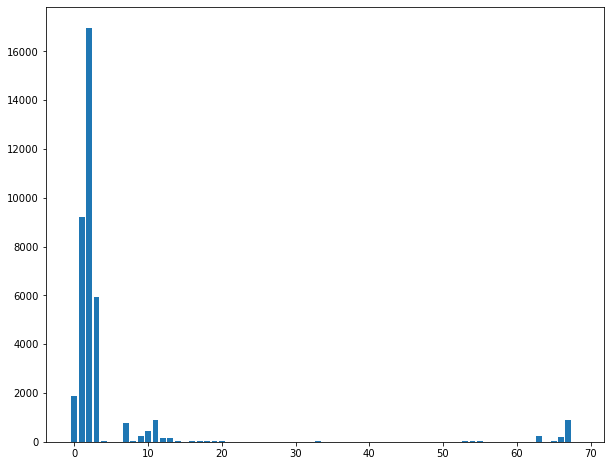

In [37]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Store Data in CSV Files for Training and Testing

In [38]:
def store_to_csv(X, Y, filename, path, store_target=True):
    '''
    This function takes to arrays (X and Y) as input and stores them as csv files.
    
    Args:
        X (np.ndarray): Sample data of shape (n_samples, n_features)
        Y (np.ndarray): Target data of shape (n_samples,)
        filename (string): The filename for the new csv file
        path (string): The path to the folder where the new csv file should be stored in
        store_target (boolean): Whether to also store the target variable in the csv file or not
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    
    X_df = pd.DataFrame(X)
    
    if not store_target:
        pd.concat([X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    else:
        Y_df = pd.DataFrame(Y)
        pd.concat([Y_df, X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    
    print(f"The file {os.path.join(path, filename)} was created.")

In [39]:
store_to_csv(X_train, Y_train, "train.csv", "data_converted", True)
store_to_csv(X_test, None, "test.csv", "data_converted", False)
store_to_csv(X_test, Y_test, "test_with_true_label.csv", "data_converted", True)
store_to_csv(X_val, Y_val, "val.csv", "data_converted", True)

The file data_converted/train.csv was created.
The file data_converted/test.csv was created.
The file data_converted/test_with_true_label.csv was created.
The file data_converted/val.csv was created.


In [40]:
import csv
# store feature list as file for later usage
features_list_csv_filepath = "data_converted/features_list.csv"

with open(features_list_csv_filepath, "w+") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(features_list)